In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
from IPython.display import Audio

In [3]:
Audio('beep-04.mp3', autoplay=True)

We already have our data split into train, validation and test sets, and it has already been preprocessed. Let's load them in


In [4]:
X_train = pd.read_csv('Modeling_Datasets/X_train_processed.csv')
X_val = pd.read_csv('Modeling_Datasets/X_val_processed.csv')
X_test = pd.read_csv('Modeling_Datasets/X_test_processed.csv')

In [5]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(17820, 457)
(7638, 457)
(10911, 457)


In [6]:
y_train = pd.read_csv('Modeling_Datasets/y_train.csv')
y_val = pd.read_csv('Modeling_Datasets/y_val.csv')
y_test = pd.read_csv('Modeling_Datasets/y_test.csv')

In [7]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(17820, 1)
(7638, 1)
(10911, 1)


In [8]:
y_train.value_counts()

review_scores_rating
5                       13892
4                        3379
3                         305
1                         132
2                         110
0                           2
dtype: int64

In [9]:
y_val.value_counts()

review_scores_rating
5                       5954
4                       1448
3                        131
1                         57
2                         47
0                          1
dtype: int64

In [10]:
y_test.value_counts()

review_scores_rating
5                       8506
4                       2069
3                        187
1                         81
2                         67
0                          1
dtype: int64

We will start with a simple decision tree model for our first try at a model:

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
train_accs = []
val_accs = []

for depth in range(1, 15):
    
    #instantiate
    dt_model = DecisionTreeClassifier(max_depth = depth)
    
    # fit
    dt_model.fit(X_train, y_train)
    
    # score on train and validation sets
    train_score = dt_model.score(X_train, y_train)
    val_score = dt_model.score(X_val, y_val)
    
    #Append to lists
    train_accs.append(train_score)
    val_accs.append(val_score)

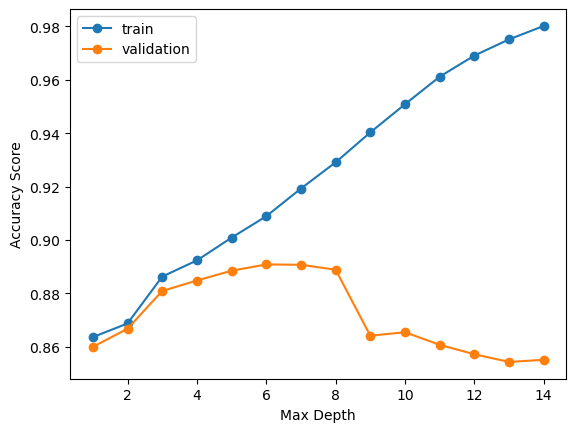

In [13]:
# Plotting the results
plt.figure()
plt.plot(range(1, 15), train_accs, label='train', marker='o')
plt.plot(range(1, 15), val_accs, label='validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [14]:
max_depth = np.argmax(val_accs)
max_depth

5

In [15]:
train_accs[max_depth]

0.9088664421997755

In [16]:
val_accs[max_depth]

0.8908091123330715

Now let's see how this model does with a `max_depth` of $5$ on the testing data:

In [17]:
final_dt_model = DecisionTreeClassifier(max_depth = 5)

final_dt_model.fit(X_train, y_train)

training_score = final_dt_model.score(X_train, y_train)
testing_score = final_dt_model.score(X_test, y_test)

print(f'Training Score: {round(training_score, 3)}')
print(f'Testing Score: {round(testing_score, 3)}')

Training Score: 0.901
Testing Score: 0.898


Classification report or confusion matrix

In [18]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [19]:
y_pred = dt_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

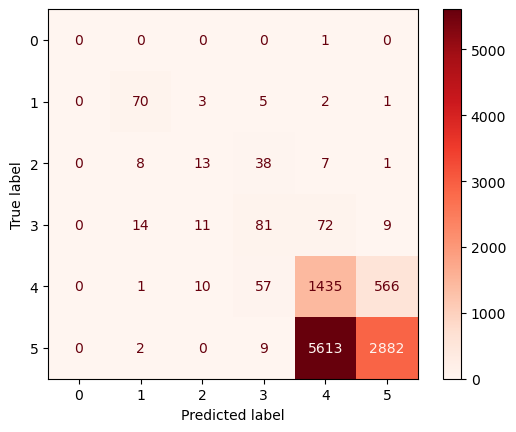

In [20]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(dt_model, X_test, y_test, cmap='Reds');

One main takeaway from this confusion matrix is that there are 5,635 scores of 5 that are predicted as 4, and 572 true 4's that were predicted as a 5.

In [21]:
from sklearn.tree import plot_tree

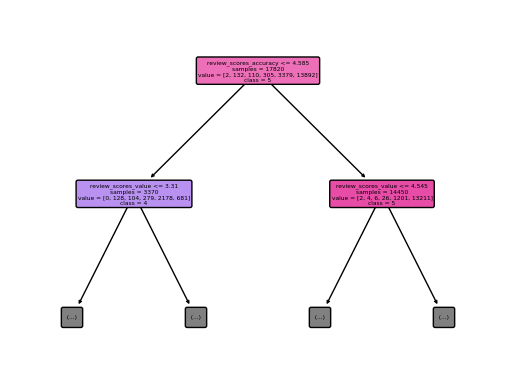

In [22]:
plot_tree(final_dt_model,
         max_depth=1,
         feature_names=X_train.columns,
         class_names=['0', '1', '2', '3', '4', '5'],
         rounded=True,
         impurity=False,
         filled=True);

This decision tree is too large to plot the entire tree. Those results were pretty good! Let's try a KNN Model.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_val_ss = ss.transform(X_val)
X_test_ss = ss.transform(X_test)

In [ ]:
neighbors = range(1, 25, 2) 
# range is a list iterator
# X_train.shape[0] = working in the first dimension of my array
#2 = step size so only odd numbers show up

train_acc = []
val_acc = []

for n in neighbors: 
    print(f"Working on my model with {n} neighbors...", end="\r")
    
    #Instantiate and Fit
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train_ss, y_train)
    
    
    #Score the model
    train_accuracy = KNN_model.score(X_train_ss, y_train)
    val_accuracy = KNN_model.score(X_val_ss, y_val)
    
    
    #Append my accuracy
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)

In [ ]:
#plot the graph
plt.figure(figsize=(8,5))
plt.plot(neighbors, val_acc, color="red", label="validation")
plt.plot(neighbors, train_acc, color="blue", label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of neighbors")
plt.title("KNN Graph")
plt.legend()
plt.show()

Based on the above graph, this model is not performing as well as our Decision Tree model. We will not pursue this model much further.

In [24]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred, average=None)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.73684211, 0.35135135, 0.42631579, 0.20126227,
       0.83318878])

In [25]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred, average=None)

array([0.        , 0.86419753, 0.19402985, 0.43315508, 0.69357177,
       0.33881966])

Let's try some feature selection with our data:

In [26]:
X_train.shape

(17820, 457)

In [27]:
#instantiate our k-best feature selector and fit

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

my_KBest = SelectKBest(f_classif, k=5).fit(X_train, y_train)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
my_KBest

SelectKBest(k=5)

In [29]:
X_train.columns

Index(['last_scraped', 'last_scraped.1', 'last_scraped.2', 'host_since',
       'host_since.1', 'host_since.2', 'calendar_last_scraped',
       'calendar_last_scraped.1', 'calendar_last_scraped.2', 'first_review',
       ...
       'desc__restaurants', 'desc__room', 'desc__size', 'desc__space',
       'desc__spacious', 'desc__street', 'desc__subway', 'desc__train',
       'desc__tv', 'desc__walk'],
      dtype='object', length=457)

In [30]:
train_score = []
val_score = []

ks = list(range(1,21))
for k in ks: 
    my_KBest = SelectKBest(f_classif, k=k).fit(X_train, y_train)
    
    X_train_selected = my_KBest.transform(X_train)
    X_val_selected = my_KBest.transform(X_val)
    
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train_selected, y_train)
    
    print(f"k = {k}, {np.array(X_train.columns)[my_KBest.get_support()]}")


#score the model
    train_score.append(model.score(X_train_selected, y_train))
    val_score.append(model.score(X_val_selected, y_val))

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation

k = 1, ['review_scores_value']
k = 2, ['review_scores_accuracy' 'review_scores_value']
k = 3, ['review_scores_accuracy' 'review_scores_communication'
 'review_scores_value']
k = 4, ['review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_communication' 'review_scores_value']


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation

k = 5, ['review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_value']
k = 6, ['review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value']
k = 7, ['review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value'
 'mhe__amenities_Dishes and silverware']
k = 8, ['host_since' 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value'
 'mhe__amenities_Dishes and silverware']


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation

k = 9, ['host_since' 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value'
 'mhe__amenities_Dishes and silverware' 'mhe__amenities_Refrigerator']
k = 10, ['host_since' 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value'
 'mhe__amenities_Dishes and silverware' 'mhe__amenities_Hot water'
 'mhe__amenities_Refrigerator']
k = 11, ['host_since' 'number_of_reviews' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'mhe__amenities_Dishes and silverware'
 'mhe__amenities_Hot water' 'mhe__amenities_Refrigerator']
k = 12, ['host_since' 'number_of_reviews' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 '

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


k = 13, ['host_since' 'number_of_reviews' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'mhe__amenities_Dishes and silverware'
 'mhe__amenities_Essentials' 'mhe__amenities_Hair dryer'
 'mhe__amenities_Hot water' 'mhe__amenities_Refrigerator']
k = 14, ['host_since' 'number_of_reviews' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'mhe__amenities_Dishes and silverware'
 'mhe__amenities_Essentials' 'mhe__amenities_Hair dryer'
 'mhe__amenities_Hot water' 'mhe__amenities_Refrigerator'
 'mhe__amenities_Shampoo']
k = 15, ['host_since' 'first_review' 'number_of_reviews' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'mhe__amenities_Dishes and silverware'
 'mhe__amenit

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


k = 16, ['host_since' 'first_review' 'availability_30' 'number_of_reviews'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value'
 'mhe__amenities_Dishes and silverware' 'mhe__amenities_Essentials'
 'mhe__amenities_Hair dryer' 'mhe__amenities_Hot water'
 'mhe__amenities_Refrigerator' 'mhe__amenities_Shampoo']
k = 17, ['host_since' 'first_review' 'availability_30' 'availability_60'
 'number_of_reviews' 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value'
 'mhe__amenities_Dishes and silverware' 'mhe__amenities_Essentials'
 'mhe__amenities_Hair dryer' 'mhe__amenities_Hot water'
 'mhe__amenities_Refrigerator' 'mhe__amenities_Shampoo']
k = 18, ['host_since' 'first_review' 'availability_30' 'availability_60'
 'number_of_reviews' 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


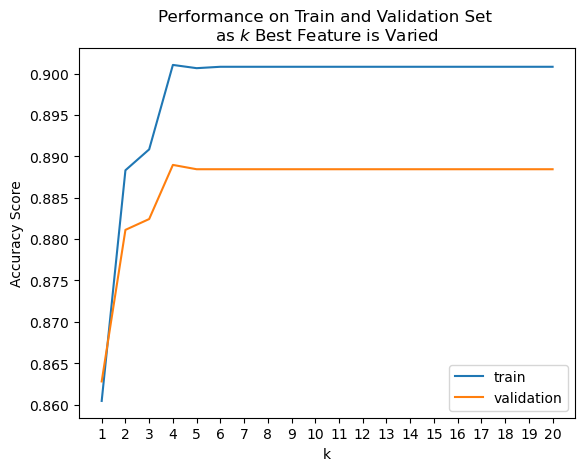

In [31]:
#plot the model
plt.figure()
plt.plot(ks, train_score, label="train")
plt.plot(ks, val_score, label="validation")
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.title("Performance on Train and Validation Set \nas $k$ Best Feature is Varied")
plt.legend()
plt.show()

Ok, that didn't really seem to help our scores at all. Let's try a 5 fold cross-validation:

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
# 1. Instanitate model
my_dt = DecisionTreeClassifier(max_depth=5)

# 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(my_dt, X_train, y_train, cv = 5)
print(scores)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.88888889 0.8973064  0.88973064 0.88945006 0.89506173]


In [34]:
# Every score corresponds to a fold
for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")

Fold 1: 0.8888888888888888
Fold 2: 0.8973063973063973
Fold 3: 0.8897306397306397
Fold 4: 0.8894500561167228
Fold 5: 0.8950617283950617


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y h

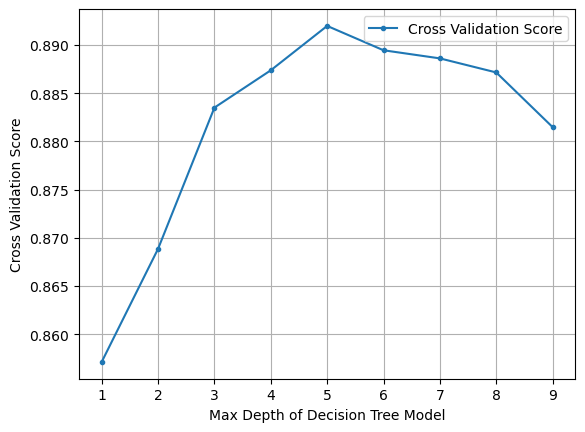

In [35]:
#Store the results
cross_validation_scores = []

depths = range(1, 10)

#Do some cross validation
for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(dt_model, X_train, y_train, cv = 5))
    
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(depths, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
#plt.xscale("log")
plt.xlabel('Max Depth of Decision Tree Model')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

This shows us what we already saw earlier in our analysis with a max_depth of 5.

## Getting rid of other review predictors

From our `SelectKBest` above, we saw that the top predictors of a host's review score were actually other scores relating to reviews! This makes sense, but isn't really helpful when we want to try and predict the score of a new host. Here we will remove those and try our model again:

In [36]:
cols_to_remove = ['review_scores_accuracy', 'review_scores_cleanliness',
 'review_scores_checkin', 'review_scores_communication',
 'review_scores_location', 'review_scores_value']

dataframes = [X_train, X_val, X_test]

for df in dataframes:
    df.drop(columns=cols_to_remove, inplace=True)
    
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(17820, 451)
(7638, 451)
(10911, 451)


Now we can re-run our Decision Tree Classifier:

In [37]:
train_accs = []
val_accs = []

for depth in range(1, 15):
    
    #instantiate
    dt_model = DecisionTreeClassifier(max_depth = depth)
    
    # fit
    dt_model.fit(X_train, y_train)
    
    # score on train and validation sets
    train_score = dt_model.score(X_train, y_train)
    val_score = dt_model.score(X_val, y_val)
    
    #Append to lists
    train_accs.append(train_score)
    val_accs.append(val_score)

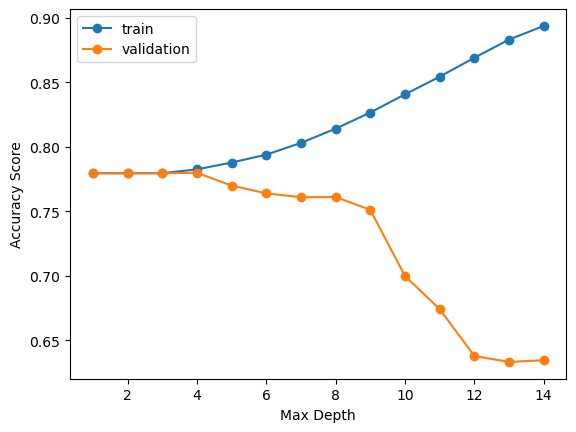

In [38]:
# Plotting the results
plt.figure()
plt.plot(range(1, 15), train_accs, label='train', marker='o')
plt.plot(range(1, 15), val_accs, label='validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [39]:
max_depth = np.argmax(val_accs)
max_depth

3

Ok, our `max_depth` parameter has changed! Let's see the accuracy scores:

In [40]:
train_accs[max_depth]

0.7825476992143658

In [41]:
val_accs[max_depth]

0.7799162084315265

Now let's see how this model does with a `max_depth` of $3$ on the testing data:

In [42]:
final_dt_model = DecisionTreeClassifier(max_depth = 3)

final_dt_model.fit(X_train, y_train)

training_score = final_dt_model.score(X_train, y_train)
testing_score = final_dt_model.score(X_test, y_test)

print(f'Training Score: {round(training_score, 3)}')
print(f'Testing Score: {round(testing_score, 3)}')

Training Score: 0.78
Testing Score: 0.78


Great, training and testing scores are about the same.

Let's try a more sophisticated model, we will do random forests here:

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
y_train.shape

(17820, 1)

In [45]:
y_train = np.ravel(y_train)
y_train.shape

(17820,)

In [46]:
y_val = np.ravel(y_val)
y_val.shape

(7638,)

In [47]:
y_test = np.ravel(y_test)
y_test.shape

(10911,)

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
n_estimators = range(200, 2000, 5)
max_features = ['auto', 'sqrt']
max_depth = range(1, 25)
min_samples_split = [1, 2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=50, cv = 5, verbose=2,
                              n_jobs=-1)

In [53]:
rf_random.fit(X_train, y_train)
Audio('beep-04.mp3', autoplay=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/william

[CV] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=870; total time=  57.8s
[CV] END bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=295; total time=  24.2s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=295; total time=  24.3s
[CV] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=360; total time=   0.2s
[CV] END bootstrap=True, max_depth=22, max

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/joblib/parallel.py", line 861, in 

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/U

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.78933782 0.79046016        nan 0.78933782 0.78956229        nan
 0.78866442 0.77957351 0.78866442        nan 0.78894501 0.78900112
 0.77957351 0.78888889 0.78103255 0.78978676 0.78569024 0.7812009
 0.79012346 0.78950617 0.77957351 0.78995511 0.77957351 0.78108866
 0.78047138 0.78097643 0.77957351 0.78647587 0.78933782 0.79012346
 0.7808642  0.78872054 0.78973064        nan 0.78984287        nan
 0.79006734 0.78748597        nan 0.78973064 0.77957351 0.77957351
 0.78933782 0.78243547 0.78142536 0.7808642  0.78872054 0.78961841
 0.78973064 0.78411897]
  warnings.warn(


In [54]:
rf_random.best_params_

{'n_estimators': 1185,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 19,
 'bootstrap': False}

In [56]:
base_rf = RandomForestClassifier(n_estimators = 10)
base_rf.fit(X_train, y_train)
base_train_score = base_rf.score(X_train, y_train)
base_val_score = base_rf.score(X_val, y_val)
print(base_train_score)
print(base_val_score)

0.9897867564534231
0.700445142707515


Our base Random Forest Model is clearly overfitting, but we are just using it as baseline so no worries there:

In [57]:
best_random = rf_random.best_estimator_
best_random_train_acc = best_random.score(X_train, y_train)
best_random_val_acc = best_random.score(X_val, y_val)
print(best_random_train_acc)
print(best_random_val_acc)

0.9410213243546577
0.781618224666143


Even our best model is still overfitting there, however we can use the results of the Random search to optimize a grid search for the same model so let's do that:


In [58]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'n_estimators': list(np.arange(1000, 1300, 60)),
    'bootstrap': [False],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt'],
    'max_depth': list(np.arange(10, 30, 4)),  
}

rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [69]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  50.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1060; total time=  51.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1180; total time=  55.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  47.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1060; total time=  50.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1180; total time=  56.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1240; total time=  57.2s
[CV] END bootstrap=False, max_dept

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  50.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1060; total time=  50.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1180; total time=  56.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1240; total time=  59.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1120; total time=  52.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1240; total time=  59.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=  45.7s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1060; total time=  53.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1120; total time=  54.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1240; total time=  59.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  47.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1120; total time=  53.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1180; total time=  56.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=  45.8s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1060; total time=  53.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1180; total time=  56.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1240; total time=  59.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1060; total time=  50.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1120; total time=  53.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1240; total time=  58.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1060; total time=  48.3s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  50.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1120; total time=  54.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1180; total time=  56.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  47.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1060; total time=  50.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1180; total time=  56.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=  46.8s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1060; total time= 1.2min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1120; total time= 1.2min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1240; total time= 1.4min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1120; total time= 1.2min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1240; total time= 1.4min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1180; total time= 1.3min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1120; total time= 1.2min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1180; total time= 1.3min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1060; total time= 1.2min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1180; total time= 1.3min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1060; total time= 1.5min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1120; total time= 1.5min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1240; total time= 1.7min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1060; total time= 1.4min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1120; total time= 1.5min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1240; total time= 1.7min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time= 1.4min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1240; total time= 1.4min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1060; total time= 1.2min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1180; total time= 1.3min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1240; total time= 1.4min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1060; total time= 1.2min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1180; total time= 1.3min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1240; total time= 1.3min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1180; total time= 1.6min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time= 1.4min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1060; total time= 1.4min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1120; total time= 1.5min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1240; total time= 1.7min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1120; total time= 1.5min
[CV] END bootstrap=False, max_dept

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [10, 14, 18, 22, 26],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [1000, 1060, 1120, 1180, 1240]},
             verbose=2)

[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1060; total time= 1.7min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1180; total time= 1.8min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1240; total time= 1.9min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1060; total time= 1.6min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1180; total time= 1.8min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1240; total time= 1.9min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1060; total time= 1.6min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1120; total time= 1.8min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1240; total time= 2.0min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 1.6min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1120; total time= 1.8min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1180; total time= 1.9min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time= 1.6min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1120; total time= 1.8min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1120; total time= 1.8min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1240; total time= 2.0min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 1.6min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1120; total time= 1.8min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1240; total time= 2.0min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time= 1.6min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1120; total time= 1.8min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1180; total time= 1.9min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1240; total time= 2.0min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1060; total time= 1.7min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1180; total time= 1.9min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1240; total time= 2.0min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1060; total time= 1.6min
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1180; total time= 1.8min
[CV] END bootstrap=False, max_dept

In [70]:
grid_search_rf.best_params_

{'bootstrap': False,
 'max_depth': 22,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1060}

In [71]:
final_rf = RandomForestClassifier(bootstrap=False, max_depth=22, max_features='sqrt', min_samples_leaf=2, 
                                 min_samples_split=6, n_estimators=1060)

final_rf.fit(X_train, y_train)
final_rf.score(X_train, y_train)

0.9763187429854097

In [72]:
final_rf.score(X_val, y_val)

0.7822728462948416

In [ ]:
n_estimators_range = range(1, 100)

results = pd.DataFrame()
for n_est in n_estimators_range:
    my_rf = RandomForestClassifier(n_estimators=n_est, max_depth=5)

    my_rf.fit(X_train, y_train)
    
    train_score = my_rf.score(X_train, y_train)
    val_score = my_rf.score(X_val, y_val)
    
    results = results.append(
        {"n_estimators": n_est, "train": train_score, "validation": val_score},
        ignore_index=True
    )
    
    print(n_est, end="\r")

In [ ]:
plt.figure(figsize=(10, 7))
results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different number of estimators")
plt.show()

Maybe we set our `max_depth` parameter too high here, let's try it with a `max_depth` set to 2.

In [ ]:
n_estimators_range = range(1, 100)

results = pd.DataFrame()
for n_est in n_estimators_range:
    my_rf2 = RandomForestClassifier(n_estimators=n_est, max_depth=2)

    my_rf2.fit(X_train, y_train)
    
    train_score = my_rf2.score(X_train, y_train)
    val_score = my_rf2.score(X_val, y_val)
    
    results = results.append(
        {"n_estimators": n_est, "train": train_score, "validation": val_score},
        ignore_index=True
    )
    
    print(n_est, end="\r")

In [ ]:
plt.figure(figsize=(10, 7))
results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different number of estimators")
plt.show()

Looks like a `n_estimators` of around 8 would be the best hyperparameter for our model, let's see how it does on the testing set:

In [ ]:
final_rf = RandomForestClassifier(n_estimators=8, max_depth=5)
final_rf.fit(X_train, y_train)
training_score = final_rf.score(X_train, y_train)
testing_score = final_rf.score(X_test, y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

That's interesting, our testing set performed better than our training set, that is usually not the case. Nonetheless, this did not perform as well as our basic decision tree model. Let's try another popular classifier method: Support Vector Machines or SVM's for short.

We will start with a linear SVM:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [ ]:

SVM_model = LinearSVC()
SVM_model.fit(X_train, y_train)

print(f"The TRAIN classification accuracy is: {SVM_model.score(X_train, y_train)}")

That score was not that great, let's try a SVC with the kernel trick. We will start with the basic `rbf` kernel:

In [ ]:
from sklearn.svm import SVC

In [ ]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_ss, y_train)
rbf_train = rbf_svm.score(X_train_ss, y_train)
rbf_test = rbf_svm.score(X_test_ss, y_test)

In [ ]:
print(f'Score on Training Set: {rbf_train}')
print(f'Score on Testing Set: {rbf_test}')

Seems like our model is overfitting, let's try 3-4 `C` values and iterate over them for our model:

In [ ]:
cs = [0.001, 0.01, 0.1, 1]
train_acc = []
val_acc = []

for c in cs:
    rbf_svm = SVC(kernel='rbf', C=c)
    rbf_svm.fit(X_train_ss, y_train)
    train_acc.append(rbf_svm.score(X_train_ss, y_train))
    val_acc.append(rbf_svm.score(X_val_ss, y_val))

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cs, train_acc, label='train', marker='o')
plt.plot(cs, val_acc, label='validation', marker='o')
plt.show()

These results were largely inconclusive, we would expect our validation accuracy to not be constant which is what the above chart is showing. Instead of trying out each method individually, let's use a `GridSearchCV` to optimize our hyperparameters:

In [ ]:
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
cachedir = mkdtemp()

estimators = [('pca', PCA()),
             ('svm', SVC())]

pipe = Pipeline(estimators)


In [ ]:
params = {'svm__kernel': ['rbf', 'poly', 'sigmoid', 'precomputed'],
    'pca__n_components': [2, 4, 6, 8, 10],}

In [ ]:

grid_search = GridSearchCV(pipe, param_grid=params)

In [ ]:
fit_search = grid_search.fit(X_train_ss, y_train)
Audio('beep-04.mp3', autoplay=True)

In [ ]:
fit_search.score(X_train_ss, y_train)

In [ ]:
fit_search.score(X_test_ss, y_test)

Still, our other models did not perform as well as the decision tree model. Let's try using the `GridSearchCV` on that model:

In [ ]:
dt_params = {
    'criterion': ['gini', 'entropy', 'loss'],
    'splitter': ['random', 'best'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7],
    
}

In [ ]:
tuned_dt = DecisionTreeClassifier()

In [ ]:
grid_cv = GridSearchCV(tuned_dt, dt_params)
grid_cv.get_params().keys()

In [ ]:
grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_params_

In [ ]:
grid_cv.score(X_train, y_train)

In [ ]:
grid_cv.score(X_val, y_val)

In [ ]:
test_dt = DecisionTreeClassifier(max_depth=5)

In [ ]:
test_dt.fit(X_train, y_train)

In [ ]:
test_dt.score(X_train, y_train)

In [ ]:
test_dt.score(X_test, y_test)

That is also pretty strange, our basic decision tree model with a depth of 5 performed better than a `GridSearchCV` over a few of the model's hyperparameters

## Addressing class imbalance in the dataset

If we look at the value counts for our dependant variable sets, we will see the following:

In [ ]:
test_y_train = pd.Series(y_train)

In [ ]:
test_y_train.value_counts()

As we can see, there are not a lot of listings with review scores of $0 - 3$. We can employ SMOTE or Synthetic Minority Over-sampling Technique

In [ ]:
print(f'Original Dataset Value Counts: {pd.Series(y_train).value_counts()}')
sm = SMOTE(sampling_strategy = 'not majority', n_jobs=-1, k_neighbors=1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [ ]:
print(f'Resampled Data Distribution: {pd.Series(y_train_sm).value_counts()}')

In [ ]:
resampled_dt = DecisionTreeClassifier(max_depth=5)
resampled_dt.fit(X_train_sm, y_train_sm)
resampled_dt.score(X_train_sm, y_train_sm)

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import BorderlineSMOTE, KMeansSMOTE, SVMSMOTE

In [ ]:
import imblearn

In [ ]:
imblearn.__version__

In [ ]:
from imblearn.over_sampling import SMOTEN